<a href="https://colab.research.google.com/github/starlingomez/preworkmac/blob/master/29_nov_xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#karl town

Updated Target Variable Statistics:
count    100.000000
mean      10.405566
std        2.296117
min        4.219770
25%        9.010382
50%       10.427817
75%       11.974104
max       14.849176
Name: TotalReboundsPerGame, dtype: float64

Data Sample:
    linepros  OffensiveReboundschance  DefensiveReboundschance  \
0   7.181751                 2.251433                14.630475   
1  14.383929                 7.091283                 6.262099   
2  11.649924                 4.514848                 7.424431   
3   9.983231                 6.068566                18.478313   
4   4.450233                 9.260532                14.096436   

   TotalReboundsPerGame  
0              8.662186  
1              9.310595  
2              9.080638  
3             13.346070  
4             11.072369  

Model Performance:
Mean Absolute Error (MAE): 0.67
Root Mean Squared Error (RMSE): 0.84
R-Squared: 0.91


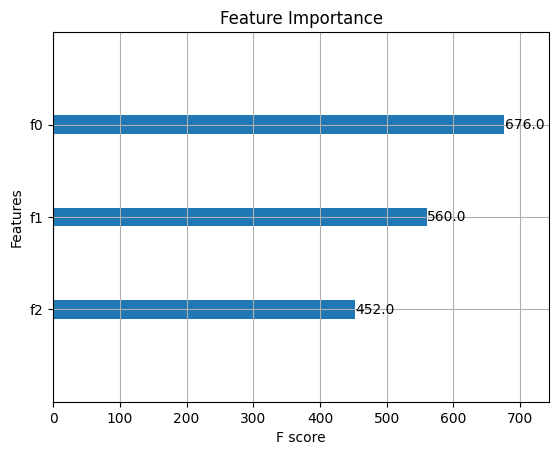


Predicted Rebounds per Game for the new player: 11.67


In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Create Hypothetical Data
# We'll create a DataFrame with made-up player statistics

# Define the number of samples
num_samples = 100

# Set random seed for reproducibility
np.random.seed(42)

# Create hypothetical features excluding 'Height', 'Weight', 'Age', and 'UsageRate'
data = pd.DataFrame({
    'linepros': np.random.uniform(2.5, 15, num_samples),
    'OffensiveReboundschance': np.random.uniform(2, 10, num_samples),
    'DefensiveReboundschance': np.random.uniform(5, 20, num_samples),
})

# Adjusted hypothetical function to calculate Total Rebounds per Game
# Recalibrated weights to center TotalReboundsPerGame around 5
# Calculated based on average feature values:
# MinutesPlayed ~25, OffensiveRebounds ~2.5, DefensiveRebounds ~5.5, TeamPace ~97.5

# New weights:
# MinutesPlayed: 0.04
# OffensiveRebounds: 0.06
# DefensiveRebounds: 0.345
# TeamPace: 0.02

data['TotalReboundsPerGame'] = (
    0.2 * data['linepros'] +
    0.6 * data['OffensiveReboundschance'] +
    0.4 * data['DefensiveReboundschance'] +
    np.random.normal(0, 0.5, num_samples)       # Noise level remains the same
)

# To ensure that the target variable is around 5, let's perform a quick check
print("Updated Target Variable Statistics:")
print(data['TotalReboundsPerGame'].describe())

# Display the first few rows
print("\nData Sample:")
print(data.head())

# Step 2: Data Preprocessing
# Handle missing values (not necessary here as we have no missing data)
# Feature selection
features = [
    'linepros',
    'OffensiveReboundschance',
    'DefensiveReboundschance',
]

# Target variable
target = 'TotalReboundsPerGame'

# Separate features and target
X = data[features]
y = data[target]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Initialize the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'  # Explicitly setting objective for clarity
)

# Step 5: Train the Model
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared: {r_squared:.2f}")

# Step 8: Feature Importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Step 9: Save the Model (Optional)
# import joblib
# joblib.dump(model, 'xgboost_nba_rebounds_model.joblib')
# print("\nModel saved as 'xgboost_nba_rebounds_model.joblib'.")

# Step 10: Example of making a prediction with new data
# Updated new_player_data without 'UsageRate', 'Height', 'Weight', and 'Age'
new_player_data = pd.DataFrame({
    'linepros': [11.5],
    'OffensiveReboundschance': [5.2],
    'DefensiveReboundschance': [14.6],

})

# Scale the new data using the same scaler
new_player_data_scaled = scaler.transform(new_player_data)

# Predict rebounds per game
predicted_rebounds = model.predict(new_player_data_scaled)
print(f"\nPredicted Rebounds per Game for the new player: {predicted_rebounds[0]:.2f}")


#josh hart

Updated Target Variable Statistics:
count    100.000000
mean      11.243292
std        2.433625
min        4.619263
25%        9.864485
50%       11.444959
75%       12.877393
max       15.557545
Name: TotalReboundsPerGame, dtype: float64

Data Sample:
    linepros  OffensiveReboundschance  DefensiveReboundschance  \
0   7.181751                 2.251433                14.630475   
1  14.383929                 7.091283                 6.262099   
2  11.649924                 4.514848                 7.424431   
3   9.983231                 6.068566                18.478313   
4   4.450233                 9.260532                14.096436   

   TotalReboundsPerGame  
0              9.380361  
1             10.748988  
2             10.245630  
3             14.344393  
4             11.517392  

Model Performance:
Mean Absolute Error (MAE): 0.76
Root Mean Squared Error (RMSE): 0.87
R-Squared: 0.92


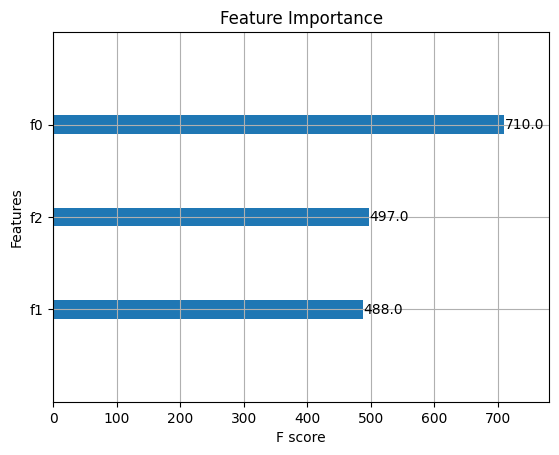


Predicted Rebounds per Game for the new player: 8.75


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Create Hypothetical Data
# We'll create a DataFrame with made-up player statistics

# Define the number of samples
num_samples = 100

# Set random seed for reproducibility
np.random.seed(42)

# Create hypothetical features excluding 'Height', 'Weight', 'Age', and 'UsageRate'
data = pd.DataFrame({
    'linepros': np.random.uniform(2.5, 15, num_samples),
    'OffensiveReboundschance': np.random.uniform(2, 10, num_samples),
    'DefensiveReboundschance': np.random.uniform(5, 20, num_samples),
})

# Adjusted hypothetical function to calculate Total Rebounds per Game
# Recalibrated weights to center TotalReboundsPerGame around 5
# Calculated based on average feature values:
# MinutesPlayed ~25, OffensiveRebounds ~2.5, DefensiveRebounds ~5.5, TeamPace ~97.5

# New weights:
# MinutesPlayed: 0.04
# OffensiveRebounds: 0.06
# DefensiveRebounds: 0.345
# TeamPace: 0.02

data['TotalReboundsPerGame'] = (
    0.3 * data['linepros'] +
    0.6 * data['OffensiveReboundschance'] +
    0.4 * data['DefensiveReboundschance'] +
    np.random.normal(0, 0.5, num_samples)       # Noise level remains the same
)

# To ensure that the target variable is around 5, let's perform a quick check
print("Updated Target Variable Statistics:")
print(data['TotalReboundsPerGame'].describe())

# Display the first few rows
print("\nData Sample:")
print(data.head())

# Step 2: Data Preprocessing
# Handle missing values (not necessary here as we have no missing data)
# Feature selection
features = [
    'linepros',
    'OffensiveReboundschance',
    'DefensiveReboundschance',
]

# Target variable
target = 'TotalReboundsPerGame'

# Separate features and target
X = data[features]
y = data[target]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Initialize the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'  # Explicitly setting objective for clarity
)

# Step 5: Train the Model
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared: {r_squared:.2f}")

# Step 8: Feature Importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Step 9: Save the Model (Optional)
# import joblib
# joblib.dump(model, 'xgboost_nba_rebounds_model.joblib')
# print("\nModel saved as 'xgboost_nba_rebounds_model.joblib'.")

# Step 10: Example of making a prediction with new data
# Updated new_player_data without 'UsageRate', 'Height', 'Weight', and 'Age'
new_player_data = pd.DataFrame({
    'linepros': [8.5],
    'OffensiveReboundschance': [3.9],
    'DefensiveReboundschance': [10.5],

})

# Scale the new data using the same scaler
new_player_data_scaled = scaler.transform(new_player_data)

# Predict rebounds per game
predicted_rebounds = model.predict(new_player_data_scaled)
print(f"\nPredicted Rebounds per Game for the new player: {predicted_rebounds[0]:.2f}")


#og onnuby

Updated Target Variable Statistics:
count    100.000000
mean      11.243292
std        2.433625
min        4.619263
25%        9.864485
50%       11.444959
75%       12.877393
max       15.557545
Name: TotalReboundsPerGame, dtype: float64

Data Sample:
    linepros  OffensiveReboundschance  DefensiveReboundschance  \
0   7.181751                 2.251433                14.630475   
1  14.383929                 7.091283                 6.262099   
2  11.649924                 4.514848                 7.424431   
3   9.983231                 6.068566                18.478313   
4   4.450233                 9.260532                14.096436   

   TotalReboundsPerGame  
0              9.380361  
1             10.748988  
2             10.245630  
3             14.344393  
4             11.517392  

Model Performance:
Mean Absolute Error (MAE): 0.76
Root Mean Squared Error (RMSE): 0.87
R-Squared: 0.92


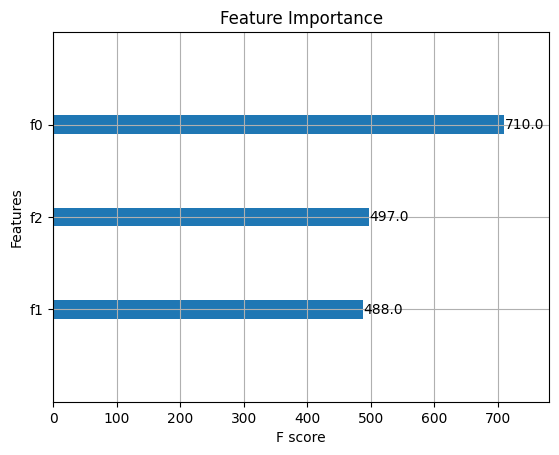


Predicted Rebounds per Game for the new player: 8.19


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Create Hypothetical Data
# We'll create a DataFrame with made-up player statistics

# Define the number of samples
num_samples = 100

# Set random seed for reproducibility
np.random.seed(42)

# Create hypothetical features excluding 'Height', 'Weight', 'Age', and 'UsageRate'
data = pd.DataFrame({
    'linepros': np.random.uniform(2.5, 15, num_samples),
    'OffensiveReboundschance': np.random.uniform(2, 10, num_samples),
    'DefensiveReboundschance': np.random.uniform(5, 20, num_samples),
})

# Adjusted hypothetical function to calculate Total Rebounds per Game
# Recalibrated weights to center TotalReboundsPerGame around 5
# Calculated based on average feature values:
# MinutesPlayed ~25, OffensiveRebounds ~2.5, DefensiveRebounds ~5.5, TeamPace ~97.5

# New weights:
# MinutesPlayed: 0.04
# OffensiveRebounds: 0.06
# DefensiveRebounds: 0.345
# TeamPace: 0.02

data['TotalReboundsPerGame'] = (
    0.3 * data['linepros'] +
    0.6 * data['OffensiveReboundschance'] +
    0.4 * data['DefensiveReboundschance'] +
    np.random.normal(0, 0.5, num_samples)       # Noise level remains the same
)

# To ensure that the target variable is around 5, let's perform a quick check
print("Updated Target Variable Statistics:")
print(data['TotalReboundsPerGame'].describe())

# Display the first few rows
print("\nData Sample:")
print(data.head())

# Step 2: Data Preprocessing
# Handle missing values (not necessary here as we have no missing data)
# Feature selection
features = [
    'linepros',
    'OffensiveReboundschance',
    'DefensiveReboundschance',
]

# Target variable
target = 'TotalReboundsPerGame'

# Separate features and target
X = data[features]
y = data[target]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Initialize the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'  # Explicitly setting objective for clarity
)

# Step 5: Train the Model
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared: {r_squared:.2f}")

# Step 8: Feature Importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Step 9: Save the Model (Optional)
# import joblib
# joblib.dump(model, 'xgboost_nba_rebounds_model.joblib')
# print("\nModel saved as 'xgboost_nba_rebounds_model.joblib'.")

# Step 10: Example of making a prediction with new data
# Updated new_player_data without 'UsageRate', 'Height', 'Weight', and 'Age'
new_player_data = pd.DataFrame({
    'linepros': [5.5],
    'OffensiveReboundschance': [4.4],
    'DefensiveReboundschance': [7.0],

})

# Scale the new data using the same scaler
new_player_data_scaled = scaler.transform(new_player_data)

# Predict rebounds per game
predicted_rebounds = model.predict(new_player_data_scaled)
print(f"\nPredicted Rebounds per Game for the new player: {predicted_rebounds[0]:.2f}")


#moussa diabate

Updated Target Variable Statistics:
count    100.000000
mean      11.243292
std        2.433625
min        4.619263
25%        9.864485
50%       11.444959
75%       12.877393
max       15.557545
Name: TotalReboundsPerGame, dtype: float64

Data Sample:
    linepros  OffensiveReboundschance  DefensiveReboundschance  \
0   7.181751                 2.251433                14.630475   
1  14.383929                 7.091283                 6.262099   
2  11.649924                 4.514848                 7.424431   
3   9.983231                 6.068566                18.478313   
4   4.450233                 9.260532                14.096436   

   TotalReboundsPerGame  
0              9.380361  
1             10.748988  
2             10.245630  
3             14.344393  
4             11.517392  

Model Performance:
Mean Absolute Error (MAE): 0.76
Root Mean Squared Error (RMSE): 0.87
R-Squared: 0.92


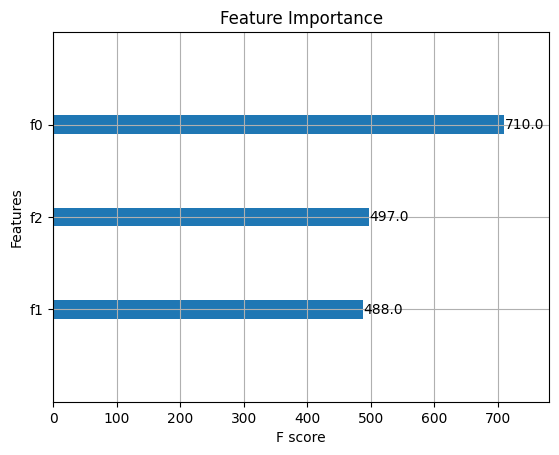


Predicted Rebounds per Game for the new player: 13.41


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Create Hypothetical Data
# We'll create a DataFrame with made-up player statistics

# Define the number of samples
num_samples = 100

# Set random seed for reproducibility
np.random.seed(42)

# Create hypothetical features excluding 'Height', 'Weight', 'Age', and 'UsageRate'
data = pd.DataFrame({
    'linepros': np.random.uniform(2.5, 15, num_samples),
    'OffensiveReboundschance': np.random.uniform(2, 10, num_samples),
    'DefensiveReboundschance': np.random.uniform(5, 20, num_samples),
})

# Adjusted hypothetical function to calculate Total Rebounds per Game
# Recalibrated weights to center TotalReboundsPerGame around 5
# Calculated based on average feature values:
# MinutesPlayed ~25, OffensiveRebounds ~2.5, DefensiveRebounds ~5.5, TeamPace ~97.5

# New weights:
# MinutesPlayed: 0.04
# OffensiveRebounds: 0.06
# DefensiveRebounds: 0.345
# TeamPace: 0.02

data['TotalReboundsPerGame'] = (
    0.3 * data['linepros'] +
    0.6 * data['OffensiveReboundschance'] +
    0.4 * data['DefensiveReboundschance'] +
    np.random.normal(0, 0.5, num_samples)       # Noise level remains the same
)

# To ensure that the target variable is around 5, let's perform a quick check
print("Updated Target Variable Statistics:")
print(data['TotalReboundsPerGame'].describe())

# Display the first few rows
print("\nData Sample:")
print(data.head())

# Step 2: Data Preprocessing
# Handle missing values (not necessary here as we have no missing data)
# Feature selection
features = [
    'linepros',
    'OffensiveReboundschance',
    'DefensiveReboundschance',
]

# Target variable
target = 'TotalReboundsPerGame'

# Separate features and target
X = data[features]
y = data[target]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Initialize the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'  # Explicitly setting objective for clarity
)

# Step 5: Train the Model
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared: {r_squared:.2f}")

# Step 8: Feature Importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Step 9: Save the Model (Optional)
# import joblib
# joblib.dump(model, 'xgboost_nba_rebounds_model.joblib')
# print("\nModel saved as 'xgboost_nba_rebounds_model.joblib'.")

# Step 10: Example of making a prediction with new data
# Updated new_player_data without 'UsageRate', 'Height', 'Weight', and 'Age'
new_player_data = pd.DataFrame({
    'linepros': [10.5],
    'OffensiveReboundschance': [10],
    'DefensiveReboundschance': [12],

})

# Scale the new data using the same scaler
new_player_data_scaled = scaler.transform(new_player_data)

# Predict rebounds per game
predicted_rebounds = model.predict(new_player_data_scaled)
print(f"\nPredicted Rebounds per Game for the new player: {predicted_rebounds[0]:.2f}")


#clint capela

Updated Target Variable Statistics:
count    100.000000
mean      10.405566
std        2.296117
min        4.219770
25%        9.010382
50%       10.427817
75%       11.974104
max       14.849176
Name: TotalReboundsPerGame, dtype: float64

Data Sample:
    linepros  OffensiveReboundschance  DefensiveReboundschance  \
0   7.181751                 2.251433                14.630475   
1  14.383929                 7.091283                 6.262099   
2  11.649924                 4.514848                 7.424431   
3   9.983231                 6.068566                18.478313   
4   4.450233                 9.260532                14.096436   

   TotalReboundsPerGame  
0              8.662186  
1              9.310595  
2              9.080638  
3             13.346070  
4             11.072369  

Model Performance:
Mean Absolute Error (MAE): 0.67
Root Mean Squared Error (RMSE): 0.84
R-Squared: 0.91


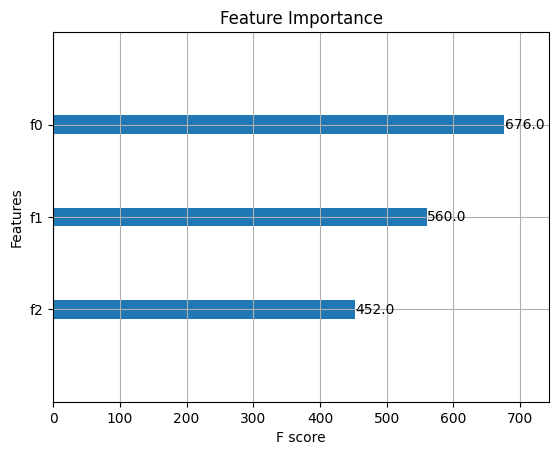


Predicted Rebounds per Game for the new player: 9.30


In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Create Hypothetical Data
# We'll create a DataFrame with made-up player statistics

# Define the number of samples
num_samples = 100

# Set random seed for reproducibility
np.random.seed(42)

# Create hypothetical features excluding 'Height', 'Weight', 'Age', and 'UsageRate'
data = pd.DataFrame({
    'linepros': np.random.uniform(2.5, 15, num_samples),
    'OffensiveReboundschance': np.random.uniform(2, 10, num_samples),
    'DefensiveReboundschance': np.random.uniform(5, 20, num_samples),
})

# Adjusted hypothetical function to calculate Total Rebounds per Game
# Recalibrated weights to center TotalReboundsPerGame around 5
# Calculated based on average feature values:
# MinutesPlayed ~25, OffensiveRebounds ~2.5, DefensiveRebounds ~5.5, TeamPace ~97.5

# New weights:
# MinutesPlayed: 0.04
# OffensiveRebounds: 0.06
# DefensiveRebounds: 0.345
# TeamPace: 0.02

data['TotalReboundsPerGame'] = (
    0.2 * data['linepros'] +
    0.6 * data['OffensiveReboundschance'] +
    0.4 * data['DefensiveReboundschance'] +
    np.random.normal(0, 0.5, num_samples)       # Noise level remains the same
)

# To ensure that the target variable is around 5, let's perform a quick check
print("Updated Target Variable Statistics:")
print(data['TotalReboundsPerGame'].describe())

# Display the first few rows
print("\nData Sample:")
print(data.head())

# Step 2: Data Preprocessing
# Handle missing values (not necessary here as we have no missing data)
# Feature selection
features = [
    'linepros',
    'OffensiveReboundschance',
    'DefensiveReboundschance',
]

# Target variable
target = 'TotalReboundsPerGame'

# Separate features and target
X = data[features]
y = data[target]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Initialize the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'  # Explicitly setting objective for clarity
)

# Step 5: Train the Model
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared: {r_squared:.2f}")

# Step 8: Feature Importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Step 9: Save the Model (Optional)
# import joblib
# joblib.dump(model, 'xgboost_nba_rebounds_model.joblib')
# print("\nModel saved as 'xgboost_nba_rebounds_model.joblib'.")

# Step 10: Example of making a prediction with new data
# Updated new_player_data without 'UsageRate', 'Height', 'Weight', and 'Age'
new_player_data = pd.DataFrame({
    'linepros': [8.5],
    'OffensiveReboundschance': [8.2],
    'DefensiveReboundschance': [8.6],

})

# Scale the new data using the same scaler
new_player_data_scaled = scaler.transform(new_player_data)

# Predict rebounds per game
predicted_rebounds = model.predict(new_player_data_scaled)
print(f"\nPredicted Rebounds per Game for the new player: {predicted_rebounds[0]:.2f}")


#okongo

Updated Target Variable Statistics:
count    100.000000
mean      11.243292
std        2.433625
min        4.619263
25%        9.864485
50%       11.444959
75%       12.877393
max       15.557545
Name: TotalReboundsPerGame, dtype: float64

Data Sample:
    linepros  OffensiveReboundschance  DefensiveReboundschance  \
0   7.181751                 2.251433                14.630475   
1  14.383929                 7.091283                 6.262099   
2  11.649924                 4.514848                 7.424431   
3   9.983231                 6.068566                18.478313   
4   4.450233                 9.260532                14.096436   

   TotalReboundsPerGame  
0              9.380361  
1             10.748988  
2             10.245630  
3             14.344393  
4             11.517392  

Model Performance:
Mean Absolute Error (MAE): 0.76
Root Mean Squared Error (RMSE): 0.87
R-Squared: 0.92


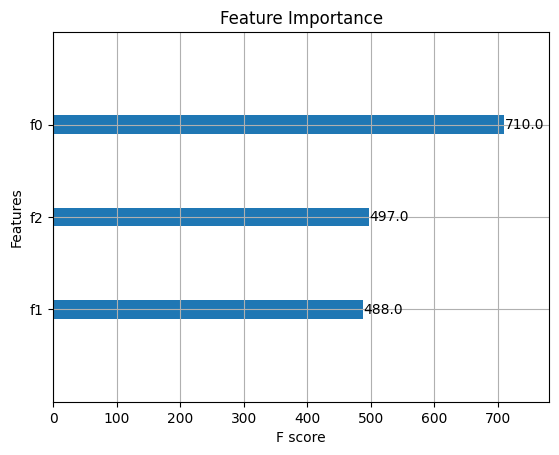


Predicted Rebounds per Game for the new player: 9.14


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Create Hypothetical Data
# We'll create a DataFrame with made-up player statistics

# Define the number of samples
num_samples = 100

# Set random seed for reproducibility
np.random.seed(42)

# Create hypothetical features excluding 'Height', 'Weight', 'Age', and 'UsageRate'
data = pd.DataFrame({
    'linepros': np.random.uniform(2.5, 15, num_samples),
    'OffensiveReboundschance': np.random.uniform(2, 10, num_samples),
    'DefensiveReboundschance': np.random.uniform(5, 20, num_samples),
})

# Adjusted hypothetical function to calculate Total Rebounds per Game
# Recalibrated weights to center TotalReboundsPerGame around 5
# Calculated based on average feature values:
# MinutesPlayed ~25, OffensiveRebounds ~2.5, DefensiveRebounds ~5.5, TeamPace ~97.5

# New weights:
# MinutesPlayed: 0.04
# OffensiveRebounds: 0.06
# DefensiveRebounds: 0.345
# TeamPace: 0.02

data['TotalReboundsPerGame'] = (
    0.3 * data['linepros'] +
    0.6 * data['OffensiveReboundschance'] +
    0.4 * data['DefensiveReboundschance'] +
    np.random.normal(0, 0.5, num_samples)       # Noise level remains the same
)

# To ensure that the target variable is around 5, let's perform a quick check
print("Updated Target Variable Statistics:")
print(data['TotalReboundsPerGame'].describe())

# Display the first few rows
print("\nData Sample:")
print(data.head())

# Step 2: Data Preprocessing
# Handle missing values (not necessary here as we have no missing data)
# Feature selection
features = [
    'linepros',
    'OffensiveReboundschance',
    'DefensiveReboundschance',
]

# Target variable
target = 'TotalReboundsPerGame'

# Separate features and target
X = data[features]
y = data[target]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Initialize the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'  # Explicitly setting objective for clarity
)

# Step 5: Train the Model
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared: {r_squared:.2f}")

# Step 8: Feature Importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Step 9: Save the Model (Optional)
# import joblib
# joblib.dump(model, 'xgboost_nba_rebounds_model.joblib')
# print("\nModel saved as 'xgboost_nba_rebounds_model.joblib'.")

# Step 10: Example of making a prediction with new data
# Updated new_player_data without 'UsageRate', 'Height', 'Weight', and 'Age'
new_player_data = pd.DataFrame({
    'linepros': [6.5],
    'OffensiveReboundschance': [5.7],
    'DefensiveReboundschance': [7.9],

})

# Scale the new data using the same scaler
new_player_data_scaled = scaler.transform(new_player_data)

# Predict rebounds per game
predicted_rebounds = model.predict(new_player_data_scaled)
print(f"\nPredicted Rebounds per Game for the new player: {predicted_rebounds[0]:.2f}")


#jarret allen

Updated Target Variable Statistics:
count    100.000000
mean      11.243292
std        2.433625
min        4.619263
25%        9.864485
50%       11.444959
75%       12.877393
max       15.557545
Name: TotalReboundsPerGame, dtype: float64

Data Sample:
    linepros  OffensiveReboundschance  DefensiveReboundschance  \
0   7.181751                 2.251433                14.630475   
1  14.383929                 7.091283                 6.262099   
2  11.649924                 4.514848                 7.424431   
3   9.983231                 6.068566                18.478313   
4   4.450233                 9.260532                14.096436   

   TotalReboundsPerGame  
0              9.380361  
1             10.748988  
2             10.245630  
3             14.344393  
4             11.517392  

Model Performance:
Mean Absolute Error (MAE): 0.76
Root Mean Squared Error (RMSE): 0.87
R-Squared: 0.92


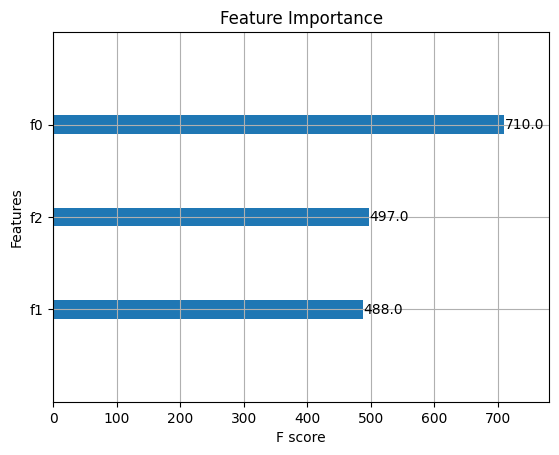


Predicted Rebounds per Game for the new player: 10.48


In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Create Hypothetical Data
# We'll create a DataFrame with made-up player statistics

# Define the number of samples
num_samples = 100

# Set random seed for reproducibility
np.random.seed(42)

# Create hypothetical features excluding 'Height', 'Weight', 'Age', and 'UsageRate'
data = pd.DataFrame({
    'linepros': np.random.uniform(2.5, 15, num_samples),
    'OffensiveReboundschance': np.random.uniform(2, 10, num_samples),
    'DefensiveReboundschance': np.random.uniform(5, 20, num_samples),
})

# Adjusted hypothetical function to calculate Total Rebounds per Game
# Recalibrated weights to center TotalReboundsPerGame around 5
# Calculated based on average feature values:
# MinutesPlayed ~25, OffensiveRebounds ~2.5, DefensiveRebounds ~5.5, TeamPace ~97.5

# New weights:
# MinutesPlayed: 0.04
# OffensiveRebounds: 0.06
# DefensiveRebounds: 0.345
# TeamPace: 0.02

data['TotalReboundsPerGame'] = (
    0.3 * data['linepros'] +
    0.6 * data['OffensiveReboundschance'] +
    0.4 * data['DefensiveReboundschance'] +
    np.random.normal(0, 0.5, num_samples)       # Noise level remains the same
)

# To ensure that the target variable is around 5, let's perform a quick check
print("Updated Target Variable Statistics:")
print(data['TotalReboundsPerGame'].describe())

# Display the first few rows
print("\nData Sample:")
print(data.head())

# Step 2: Data Preprocessing
# Handle missing values (not necessary here as we have no missing data)
# Feature selection
features = [
    'linepros',
    'OffensiveReboundschance',
    'DefensiveReboundschance',
]

# Target variable
target = 'TotalReboundsPerGame'

# Separate features and target
X = data[features]
y = data[target]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Initialize the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'  # Explicitly setting objective for clarity
)

# Step 5: Train the Model
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared: {r_squared:.2f}")

# Step 8: Feature Importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Step 9: Save the Model (Optional)
# import joblib
# joblib.dump(model, 'xgboost_nba_rebounds_model.joblib')
# print("\nModel saved as 'xgboost_nba_rebounds_model.joblib'.")

# Step 10: Example of making a prediction with new data
# Updated new_player_data without 'UsageRate', 'Height', 'Weight', and 'Age'
new_player_data = pd.DataFrame({
    'linepros': [11.5],
    'OffensiveReboundschance': [6],
    'DefensiveReboundschance': [10.6],

})

# Scale the new data using the same scaler
new_player_data_scaled = scaler.transform(new_player_data)

# Predict rebounds per game
predicted_rebounds = model.predict(new_player_data_scaled)
print(f"\nPredicted Rebounds per Game for the new player: {predicted_rebounds[0]:.2f}")


#evan moobley

Updated Target Variable Statistics:
count    100.000000
mean      11.243292
std        2.433625
min        4.619263
25%        9.864485
50%       11.444959
75%       12.877393
max       15.557545
Name: TotalReboundsPerGame, dtype: float64

Data Sample:
    linepros  OffensiveReboundschance  DefensiveReboundschance  \
0   7.181751                 2.251433                14.630475   
1  14.383929                 7.091283                 6.262099   
2  11.649924                 4.514848                 7.424431   
3   9.983231                 6.068566                18.478313   
4   4.450233                 9.260532                14.096436   

   TotalReboundsPerGame  
0              9.380361  
1             10.748988  
2             10.245630  
3             14.344393  
4             11.517392  

Model Performance:
Mean Absolute Error (MAE): 0.76
Root Mean Squared Error (RMSE): 0.87
R-Squared: 0.92


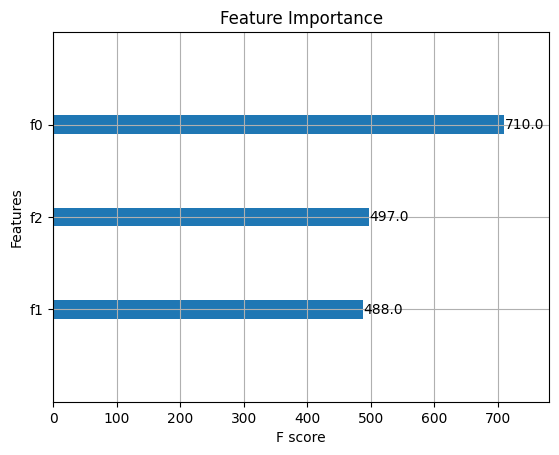


Predicted Rebounds per Game for the new player: 10.48


In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Create Hypothetical Data
# We'll create a DataFrame with made-up player statistics

# Define the number of samples
num_samples = 100

# Set random seed for reproducibility
np.random.seed(42)

# Create hypothetical features excluding 'Height', 'Weight', 'Age', and 'UsageRate'
data = pd.DataFrame({
    'linepros': np.random.uniform(2.5, 15, num_samples),
    'OffensiveReboundschance': np.random.uniform(2, 10, num_samples),
    'DefensiveReboundschance': np.random.uniform(5, 20, num_samples),
})

# Adjusted hypothetical function to calculate Total Rebounds per Game
# Recalibrated weights to center TotalReboundsPerGame around 5
# Calculated based on average feature values:
# MinutesPlayed ~25, OffensiveRebounds ~2.5, DefensiveRebounds ~5.5, TeamPace ~97.5

# New weights:
# MinutesPlayed: 0.04
# OffensiveRebounds: 0.06
# DefensiveRebounds: 0.345
# TeamPace: 0.02

data['TotalReboundsPerGame'] = (
    0.3 * data['linepros'] +
    0.6 * data['OffensiveReboundschance'] +
    0.4 * data['DefensiveReboundschance'] +
    np.random.normal(0, 0.5, num_samples)       # Noise level remains the same
)

# To ensure that the target variable is around 5, let's perform a quick check
print("Updated Target Variable Statistics:")
print(data['TotalReboundsPerGame'].describe())

# Display the first few rows
print("\nData Sample:")
print(data.head())

# Step 2: Data Preprocessing
# Handle missing values (not necessary here as we have no missing data)
# Feature selection
features = [
    'linepros',
    'OffensiveReboundschance',
    'DefensiveReboundschance',
]

# Target variable
target = 'TotalReboundsPerGame'

# Separate features and target
X = data[features]
y = data[target]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Initialize the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'  # Explicitly setting objective for clarity
)

# Step 5: Train the Model
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared: {r_squared:.2f}")

# Step 8: Feature Importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Step 9: Save the Model (Optional)
# import joblib
# joblib.dump(model, 'xgboost_nba_rebounds_model.joblib')
# print("\nModel saved as 'xgboost_nba_rebounds_model.joblib'.")

# Step 10: Example of making a prediction with new data
# Updated new_player_data without 'UsageRate', 'Height', 'Weight', and 'Age'
new_player_data = pd.DataFrame({
    'linepros': [11.5],
    'OffensiveReboundschance': [5.7],
    'DefensiveReboundschance': [10.6],

})

# Scale the new data using the same scaler
new_player_data_scaled = scaler.transform(new_player_data)

# Predict rebounds per game
predicted_rebounds = model.predict(new_player_data_scaled)
print(f"\nPredicted Rebounds per Game for the new player: {predicted_rebounds[0]:.2f}")


#brandone clark

Updated Target Variable Statistics:
count    100.000000
mean      11.243292
std        2.433625
min        4.619263
25%        9.864485
50%       11.444959
75%       12.877393
max       15.557545
Name: TotalReboundsPerGame, dtype: float64

Data Sample:
    linepros  OffensiveReboundschance  DefensiveReboundschance  \
0   7.181751                 2.251433                14.630475   
1  14.383929                 7.091283                 6.262099   
2  11.649924                 4.514848                 7.424431   
3   9.983231                 6.068566                18.478313   
4   4.450233                 9.260532                14.096436   

   TotalReboundsPerGame  
0              9.380361  
1             10.748988  
2             10.245630  
3             14.344393  
4             11.517392  

Model Performance:
Mean Absolute Error (MAE): 0.76
Root Mean Squared Error (RMSE): 0.87
R-Squared: 0.92


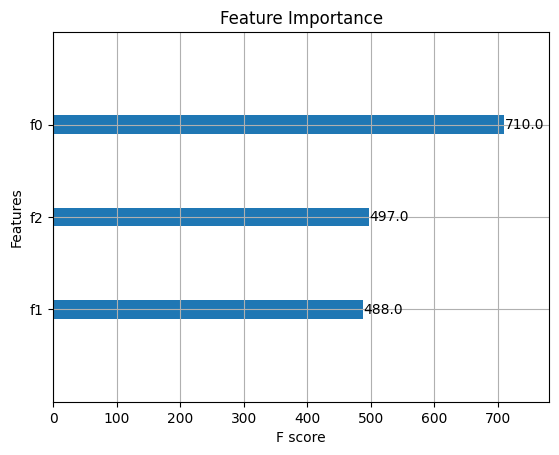


Predicted Rebounds per Game for the new player: 7.66


In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Create Hypothetical Data
# We'll create a DataFrame with made-up player statistics

# Define the number of samples
num_samples = 100

# Set random seed for reproducibility
np.random.seed(42)

# Create hypothetical features excluding 'Height', 'Weight', 'Age', and 'UsageRate'
data = pd.DataFrame({
    'linepros': np.random.uniform(2.5, 15, num_samples),
    'OffensiveReboundschance': np.random.uniform(2, 10, num_samples),
    'DefensiveReboundschance': np.random.uniform(5, 20, num_samples),
})

# Adjusted hypothetical function to calculate Total Rebounds per Game
# Recalibrated weights to center TotalReboundsPerGame around 5
# Calculated based on average feature values:
# MinutesPlayed ~25, OffensiveRebounds ~2.5, DefensiveRebounds ~5.5, TeamPace ~97.5

# New weights:
# MinutesPlayed: 0.04
# OffensiveRebounds: 0.06
# DefensiveRebounds: 0.345
# TeamPace: 0.02

data['TotalReboundsPerGame'] = (
    0.3 * data['linepros'] +
    0.6 * data['OffensiveReboundschance'] +
    0.4 * data['DefensiveReboundschance'] +
    np.random.normal(0, 0.5, num_samples)       # Noise level remains the same
)

# To ensure that the target variable is around 5, let's perform a quick check
print("Updated Target Variable Statistics:")
print(data['TotalReboundsPerGame'].describe())

# Display the first few rows
print("\nData Sample:")
print(data.head())

# Step 2: Data Preprocessing
# Handle missing values (not necessary here as we have no missing data)
# Feature selection
features = [
    'linepros',
    'OffensiveReboundschance',
    'DefensiveReboundschance',
]

# Target variable
target = 'TotalReboundsPerGame'

# Separate features and target
X = data[features]
y = data[target]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Initialize the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'  # Explicitly setting objective for clarity
)

# Step 5: Train the Model
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared: {r_squared:.2f}")

# Step 8: Feature Importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Step 9: Save the Model (Optional)
# import joblib
# joblib.dump(model, 'xgboost_nba_rebounds_model.joblib')
# print("\nModel saved as 'xgboost_nba_rebounds_model.joblib'.")

# Step 10: Example of making a prediction with new data
# Updated new_player_data without 'UsageRate', 'Height', 'Weight', and 'Age'
new_player_data = pd.DataFrame({
    'linepros': [6.5],
    'OffensiveReboundschance': [4.7],
    'DefensiveReboundschance': [6.7],

})

# Scale the new data using the same scaler
new_player_data_scaled = scaler.transform(new_player_data)

# Predict rebounds per game
predicted_rebounds = model.predict(new_player_data_scaled)
print(f"\nPredicted Rebounds per Game for the new player: {predicted_rebounds[0]:.2f}")


#goga bitadze

Updated Target Variable Statistics:
count    100.000000
mean      11.243292
std        2.433625
min        4.619263
25%        9.864485
50%       11.444959
75%       12.877393
max       15.557545
Name: TotalReboundsPerGame, dtype: float64

Data Sample:
    linepros  OffensiveReboundschance  DefensiveReboundschance  \
0   7.181751                 2.251433                14.630475   
1  14.383929                 7.091283                 6.262099   
2  11.649924                 4.514848                 7.424431   
3   9.983231                 6.068566                18.478313   
4   4.450233                 9.260532                14.096436   

   TotalReboundsPerGame  
0              9.380361  
1             10.748988  
2             10.245630  
3             14.344393  
4             11.517392  

Model Performance:
Mean Absolute Error (MAE): 0.76
Root Mean Squared Error (RMSE): 0.87
R-Squared: 0.92


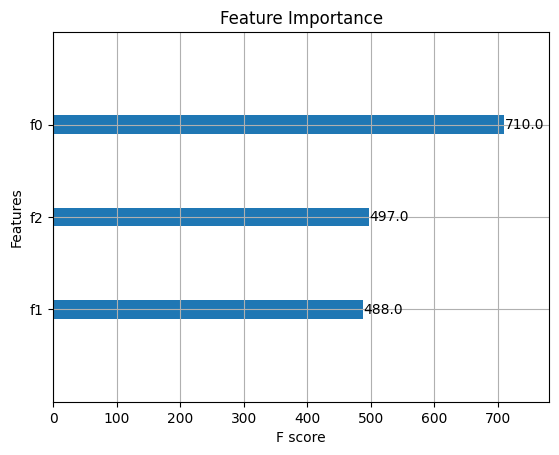


Predicted Rebounds per Game for the new player: 9.14


In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Create Hypothetical Data
# We'll create a DataFrame with made-up player statistics

# Define the number of samples
num_samples = 100

# Set random seed for reproducibility
np.random.seed(42)

# Create hypothetical features excluding 'Height', 'Weight', 'Age', and 'UsageRate'
data = pd.DataFrame({
    'linepros': np.random.uniform(2.5, 15, num_samples),
    'OffensiveReboundschance': np.random.uniform(2, 10, num_samples),
    'DefensiveReboundschance': np.random.uniform(5, 20, num_samples),
})

# Adjusted hypothetical function to calculate Total Rebounds per Game
# Recalibrated weights to center TotalReboundsPerGame around 5
# Calculated based on average feature values:
# MinutesPlayed ~25, OffensiveRebounds ~2.5, DefensiveRebounds ~5.5, TeamPace ~97.5

# New weights:
# MinutesPlayed: 0.04
# OffensiveRebounds: 0.06
# DefensiveRebounds: 0.345
# TeamPace: 0.02

data['TotalReboundsPerGame'] = (
    0.3 * data['linepros'] +
    0.6 * data['OffensiveReboundschance'] +
    0.4 * data['DefensiveReboundschance'] +
    np.random.normal(0, 0.5, num_samples)       # Noise level remains the same
)

# To ensure that the target variable is around 5, let's perform a quick check
print("Updated Target Variable Statistics:")
print(data['TotalReboundsPerGame'].describe())

# Display the first few rows
print("\nData Sample:")
print(data.head())

# Step 2: Data Preprocessing
# Handle missing values (not necessary here as we have no missing data)
# Feature selection
features = [
    'linepros',
    'OffensiveReboundschance',
    'DefensiveReboundschance',
]

# Target variable
target = 'TotalReboundsPerGame'

# Separate features and target
X = data[features]
y = data[target]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Initialize the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'  # Explicitly setting objective for clarity
)

# Step 5: Train the Model
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared: {r_squared:.2f}")

# Step 8: Feature Importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Step 9: Save the Model (Optional)
# import joblib
# joblib.dump(model, 'xgboost_nba_rebounds_model.joblib')
# print("\nModel saved as 'xgboost_nba_rebounds_model.joblib'.")

# Step 10: Example of making a prediction with new data
# Updated new_player_data without 'UsageRate', 'Height', 'Weight', and 'Age'
new_player_data = pd.DataFrame({
    'linepros': [6.5],
    'OffensiveReboundschance': [5.7],
    'DefensiveReboundschance': [8.3],

})

# Scale the new data using the same scaler
new_player_data_scaled = scaler.transform(new_player_data)

# Predict rebounds per game
predicted_rebounds = model.predict(new_player_data_scaled)
print(f"\nPredicted Rebounds per Game for the new player: {predicted_rebounds[0]:.2f}")


#frank wagner

Updated Target Variable Statistics:
count    100.000000
mean      11.243292
std        2.433625
min        4.619263
25%        9.864485
50%       11.444959
75%       12.877393
max       15.557545
Name: TotalReboundsPerGame, dtype: float64

Data Sample:
    linepros  OffensiveReboundschance  DefensiveReboundschance  \
0   7.181751                 2.251433                14.630475   
1  14.383929                 7.091283                 6.262099   
2  11.649924                 4.514848                 7.424431   
3   9.983231                 6.068566                18.478313   
4   4.450233                 9.260532                14.096436   

   TotalReboundsPerGame  
0              9.380361  
1             10.748988  
2             10.245630  
3             14.344393  
4             11.517392  

Model Performance:
Mean Absolute Error (MAE): 0.76
Root Mean Squared Error (RMSE): 0.87
R-Squared: 0.92


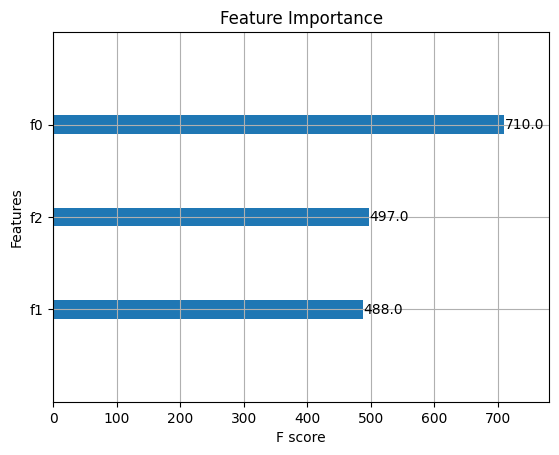


Predicted Rebounds per Game for the new player: 7.39


In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Create Hypothetical Data
# We'll create a DataFrame with made-up player statistics

# Define the number of samples
num_samples = 100

# Set random seed for reproducibility
np.random.seed(42)

# Create hypothetical features excluding 'Height', 'Weight', 'Age', and 'UsageRate'
data = pd.DataFrame({
    'linepros': np.random.uniform(2.5, 15, num_samples),
    'OffensiveReboundschance': np.random.uniform(2, 10, num_samples),
    'DefensiveReboundschance': np.random.uniform(5, 20, num_samples),
})

# Adjusted hypothetical function to calculate Total Rebounds per Game
# Recalibrated weights to center TotalReboundsPerGame around 5
# Calculated based on average feature values:
# MinutesPlayed ~25, OffensiveRebounds ~2.5, DefensiveRebounds ~5.5, TeamPace ~97.5

# New weights:
# MinutesPlayed: 0.04
# OffensiveRebounds: 0.06
# DefensiveRebounds: 0.345
# TeamPace: 0.02

data['TotalReboundsPerGame'] = (
    0.3 * data['linepros'] +
    0.6 * data['OffensiveReboundschance'] +
    0.4 * data['DefensiveReboundschance'] +
    np.random.normal(0, 0.5, num_samples)       # Noise level remains the same
)

# To ensure that the target variable is around 5, let's perform a quick check
print("Updated Target Variable Statistics:")
print(data['TotalReboundsPerGame'].describe())

# Display the first few rows
print("\nData Sample:")
print(data.head())

# Step 2: Data Preprocessing
# Handle missing values (not necessary here as we have no missing data)
# Feature selection
features = [
    'linepros',
    'OffensiveReboundschance',
    'DefensiveReboundschance',
]

# Target variable
target = 'TotalReboundsPerGame'

# Separate features and target
X = data[features]
y = data[target]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Initialize the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'  # Explicitly setting objective for clarity
)

# Step 5: Train the Model
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared: {r_squared:.2f}")

# Step 8: Feature Importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Step 9: Save the Model (Optional)
# import joblib
# joblib.dump(model, 'xgboost_nba_rebounds_model.joblib')
# print("\nModel saved as 'xgboost_nba_rebounds_model.joblib'.")

# Step 10: Example of making a prediction with new data
# Updated new_player_data without 'UsageRate', 'Height', 'Weight', and 'Age'
new_player_data = pd.DataFrame({
    'linepros': [5.5],
    'OffensiveReboundschance': [2.8],
    'DefensiveReboundschance': [7.4],

})

# Scale the new data using the same scaler
new_player_data_scaled = scaler.transform(new_player_data)

# Predict rebounds per game
predicted_rebounds = model.predict(new_player_data_scaled)
print(f"\nPredicted Rebounds per Game for the new player: {predicted_rebounds[0]:.2f}")


#ivica zubac

Updated Target Variable Statistics:
count    100.000000
mean      10.405566
std        2.296117
min        4.219770
25%        9.010382
50%       10.427817
75%       11.974104
max       14.849176
Name: TotalReboundsPerGame, dtype: float64

Data Sample:
    linepros  OffensiveReboundschance  DefensiveReboundschance  \
0   7.181751                 2.251433                14.630475   
1  14.383929                 7.091283                 6.262099   
2  11.649924                 4.514848                 7.424431   
3   9.983231                 6.068566                18.478313   
4   4.450233                 9.260532                14.096436   

   TotalReboundsPerGame  
0              8.662186  
1              9.310595  
2              9.080638  
3             13.346070  
4             11.072369  

Model Performance:
Mean Absolute Error (MAE): 0.67
Root Mean Squared Error (RMSE): 0.84
R-Squared: 0.91


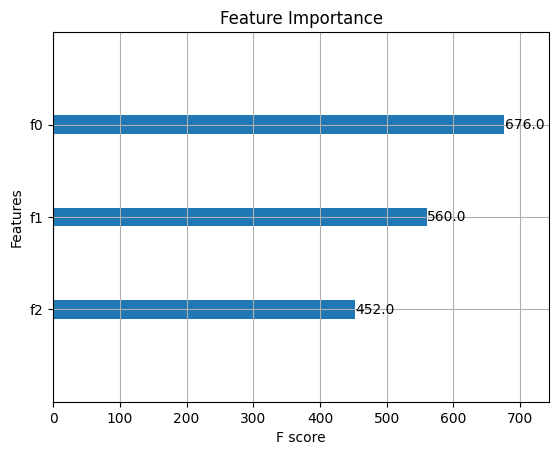


Predicted Rebounds per Game for the new player: 11.12


In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Create Hypothetical Data
# We'll create a DataFrame with made-up player statistics

# Define the number of samples
num_samples = 100

# Set random seed for reproducibility
np.random.seed(42)

# Create hypothetical features excluding 'Height', 'Weight', 'Age', and 'UsageRate'
data = pd.DataFrame({
    'linepros': np.random.uniform(2.5, 15, num_samples),
    'OffensiveReboundschance': np.random.uniform(2, 10, num_samples),
    'DefensiveReboundschance': np.random.uniform(5, 20, num_samples),
})

# Adjusted hypothetical function to calculate Total Rebounds per Game
# Recalibrated weights to center TotalReboundsPerGame around 5
# Calculated based on average feature values:
# MinutesPlayed ~25, OffensiveRebounds ~2.5, DefensiveRebounds ~5.5, TeamPace ~97.5

# New weights:
# MinutesPlayed: 0.04
# OffensiveRebounds: 0.06
# DefensiveRebounds: 0.345
# TeamPace: 0.02

data['TotalReboundsPerGame'] = (
    0.2 * data['linepros'] +
    0.6 * data['OffensiveReboundschance'] +
    0.4 * data['DefensiveReboundschance'] +
    np.random.normal(0, 0.5, num_samples)       # Noise level remains the same
)

# To ensure that the target variable is around 5, let's perform a quick check
print("Updated Target Variable Statistics:")
print(data['TotalReboundsPerGame'].describe())

# Display the first few rows
print("\nData Sample:")
print(data.head())

# Step 2: Data Preprocessing
# Handle missing values (not necessary here as we have no missing data)
# Feature selection
features = [
    'linepros',
    'OffensiveReboundschance',
    'DefensiveReboundschance',
]

# Target variable
target = 'TotalReboundsPerGame'

# Separate features and target
X = data[features]
y = data[target]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Initialize the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'  # Explicitly setting objective for clarity
)

# Step 5: Train the Model
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared: {r_squared:.2f}")

# Step 8: Feature Importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Step 9: Save the Model (Optional)
# import joblib
# joblib.dump(model, 'xgboost_nba_rebounds_model.joblib')
# print("\nModel saved as 'xgboost_nba_rebounds_model.joblib'.")

# Step 10: Example of making a prediction with new data
# Updated new_player_data without 'UsageRate', 'Height', 'Weight', and 'Age'
new_player_data = pd.DataFrame({
    'linepros': [10.5],
    'OffensiveReboundschance': [6.4],
    'DefensiveReboundschance': [13.1],

})

# Scale the new data using the same scaler
new_player_data_scaled = scaler.transform(new_player_data)

# Predict rebounds per game
predicted_rebounds = model.predict(new_player_data_scaled)
print(f"\nPredicted Rebounds per Game for the new player: {predicted_rebounds[0]:.2f}")


#jalen duren

Updated Target Variable Statistics:
count    100.000000
mean      11.243292
std        2.433625
min        4.619263
25%        9.864485
50%       11.444959
75%       12.877393
max       15.557545
Name: TotalReboundsPerGame, dtype: float64

Data Sample:
    linepros  OffensiveReboundschance  DefensiveReboundschance  \
0   7.181751                 2.251433                14.630475   
1  14.383929                 7.091283                 6.262099   
2  11.649924                 4.514848                 7.424431   
3   9.983231                 6.068566                18.478313   
4   4.450233                 9.260532                14.096436   

   TotalReboundsPerGame  
0              9.380361  
1             10.748988  
2             10.245630  
3             14.344393  
4             11.517392  

Model Performance:
Mean Absolute Error (MAE): 0.76
Root Mean Squared Error (RMSE): 0.87
R-Squared: 0.92


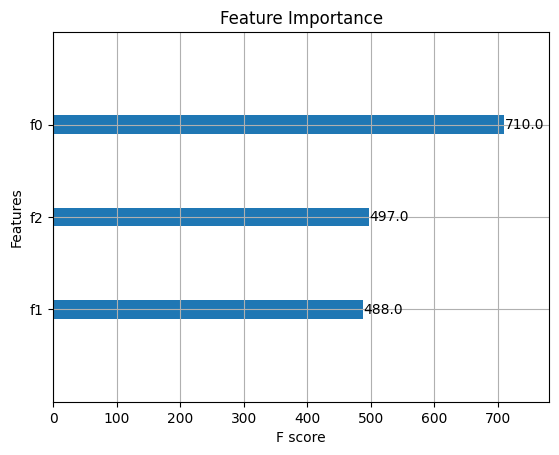


Predicted Rebounds per Game for the new player: 12.58


In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Create Hypothetical Data
# We'll create a DataFrame with made-up player statistics

# Define the number of samples
num_samples = 100

# Set random seed for reproducibility
np.random.seed(42)

# Create hypothetical features excluding 'Height', 'Weight', 'Age', and 'UsageRate'
data = pd.DataFrame({
    'linepros': np.random.uniform(2.5, 15, num_samples),
    'OffensiveReboundschance': np.random.uniform(2, 10, num_samples),
    'DefensiveReboundschance': np.random.uniform(5, 20, num_samples),
})

# Adjusted hypothetical function to calculate Total Rebounds per Game
# Recalibrated weights to center TotalReboundsPerGame around 5
# Calculated based on average feature values:
# MinutesPlayed ~25, OffensiveRebounds ~2.5, DefensiveRebounds ~5.5, TeamPace ~97.5

# New weights:
# MinutesPlayed: 0.04
# OffensiveRebounds: 0.06
# DefensiveRebounds: 0.345
# TeamPace: 0.02

data['TotalReboundsPerGame'] = (
    0.3 * data['linepros'] +
    0.6 * data['OffensiveReboundschance'] +
    0.4 * data['DefensiveReboundschance'] +
    np.random.normal(0, 0.5, num_samples)       # Noise level remains the same
)

# To ensure that the target variable is around 5, let's perform a quick check
print("Updated Target Variable Statistics:")
print(data['TotalReboundsPerGame'].describe())

# Display the first few rows
print("\nData Sample:")
print(data.head())

# Step 2: Data Preprocessing
# Handle missing values (not necessary here as we have no missing data)
# Feature selection
features = [
    'linepros',
    'OffensiveReboundschance',
    'DefensiveReboundschance',
]

# Target variable
target = 'TotalReboundsPerGame'

# Separate features and target
X = data[features]
y = data[target]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Initialize the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'  # Explicitly setting objective for clarity
)

# Step 5: Train the Model
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared: {r_squared:.2f}")

# Step 8: Feature Importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Step 9: Save the Model (Optional)
# import joblib
# joblib.dump(model, 'xgboost_nba_rebounds_model.joblib')
# print("\nModel saved as 'xgboost_nba_rebounds_model.joblib'.")

# Step 10: Example of making a prediction with new data
# Updated new_player_data without 'UsageRate', 'Height', 'Weight', and 'Age'
new_player_data = pd.DataFrame({
    'linepros': [10.5],
    'OffensiveReboundschance': [8.2],
    'DefensiveReboundschance': [11.7],

})

# Scale the new data using the same scaler
new_player_data_scaled = scaler.transform(new_player_data)

# Predict rebounds per game
predicted_rebounds = model.predict(new_player_data_scaled)
print(f"\nPredicted Rebounds per Game for the new player: {predicted_rebounds[0]:.2f}")


#cade cunningham

Updated Target Variable Statistics:
count    100.000000
mean      11.243292
std        2.433625
min        4.619263
25%        9.864485
50%       11.444959
75%       12.877393
max       15.557545
Name: TotalReboundsPerGame, dtype: float64

Data Sample:
    linepros  OffensiveReboundschance  DefensiveReboundschance  \
0   7.181751                 2.251433                14.630475   
1  14.383929                 7.091283                 6.262099   
2  11.649924                 4.514848                 7.424431   
3   9.983231                 6.068566                18.478313   
4   4.450233                 9.260532                14.096436   

   TotalReboundsPerGame  
0              9.380361  
1             10.748988  
2             10.245630  
3             14.344393  
4             11.517392  

Model Performance:
Mean Absolute Error (MAE): 0.76
Root Mean Squared Error (RMSE): 0.87
R-Squared: 0.92


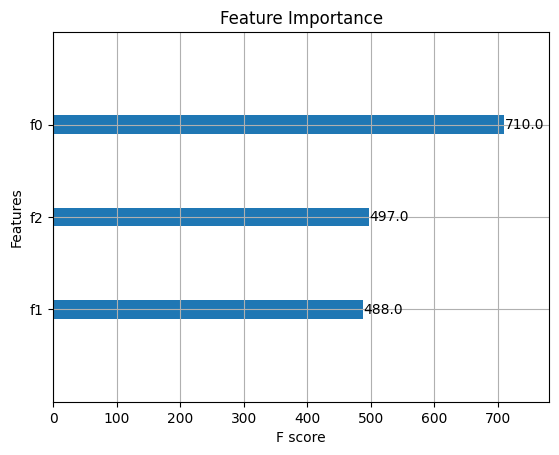


Predicted Rebounds per Game for the new player: 9.27


In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Create Hypothetical Data
# We'll create a DataFrame with made-up player statistics

# Define the number of samples
num_samples = 100

# Set random seed for reproducibility
np.random.seed(42)

# Create hypothetical features excluding 'Height', 'Weight', 'Age', and 'UsageRate'
data = pd.DataFrame({
    'linepros': np.random.uniform(2.5, 15, num_samples),
    'OffensiveReboundschance': np.random.uniform(2, 10, num_samples),
    'DefensiveReboundschance': np.random.uniform(5, 20, num_samples),
})

# Adjusted hypothetical function to calculate Total Rebounds per Game
# Recalibrated weights to center TotalReboundsPerGame around 5
# Calculated based on average feature values:
# MinutesPlayed ~25, OffensiveRebounds ~2.5, DefensiveRebounds ~5.5, TeamPace ~97.5

# New weights:
# MinutesPlayed: 0.04
# OffensiveRebounds: 0.06
# DefensiveRebounds: 0.345
# TeamPace: 0.02

data['TotalReboundsPerGame'] = (
    0.3 * data['linepros'] +
    0.6 * data['OffensiveReboundschance'] +
    0.4 * data['DefensiveReboundschance'] +
    np.random.normal(0, 0.5, num_samples)       # Noise level remains the same
)

# To ensure that the target variable is around 5, let's perform a quick check
print("Updated Target Variable Statistics:")
print(data['TotalReboundsPerGame'].describe())

# Display the first few rows
print("\nData Sample:")
print(data.head())

# Step 2: Data Preprocessing
# Handle missing values (not necessary here as we have no missing data)
# Feature selection
features = [
    'linepros',
    'OffensiveReboundschance',
    'DefensiveReboundschance',
]

# Target variable
target = 'TotalReboundsPerGame'

# Separate features and target
X = data[features]
y = data[target]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Initialize the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'  # Explicitly setting objective for clarity
)

# Step 5: Train the Model
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared: {r_squared:.2f}")

# Step 8: Feature Importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Step 9: Save the Model (Optional)
# import joblib
# joblib.dump(model, 'xgboost_nba_rebounds_model.joblib')
# print("\nModel saved as 'xgboost_nba_rebounds_model.joblib'.")

# Step 10: Example of making a prediction with new data
# Updated new_player_data without 'UsageRate', 'Height', 'Weight', and 'Age'
new_player_data = pd.DataFrame({
    'linepros': [10.5],
    'OffensiveReboundschance': [3.9],
    'DefensiveReboundschance': [8.9],

})

# Scale the new data using the same scaler
new_player_data_scaled = scaler.transform(new_player_data)

# Predict rebounds per game
predicted_rebounds = model.predict(new_player_data_scaled)
print(f"\nPredicted Rebounds per Game for the new player: {predicted_rebounds[0]:.2f}")


#jacob poltl

Updated Target Variable Statistics:
count    100.000000
mean       9.567840
std        2.213219
min        3.820277
25%        7.936920
50%        9.605297
75%       11.180100
max       14.446628
Name: TotalReboundsPerGame, dtype: float64

Data Sample:
    linepros  OffensiveReboundschance  DefensiveReboundschance  \
0   7.181751                 2.251433                14.630475   
1  14.383929                 7.091283                 6.262099   
2  11.649924                 4.514848                 7.424431   
3   9.983231                 6.068566                18.478313   
4   4.450233                 9.260532                14.096436   

   TotalReboundsPerGame  
0              7.944011  
1              7.872202  
2              7.915645  
3             12.347747  
4             10.627345  

Model Performance:
Mean Absolute Error (MAE): 0.63
Root Mean Squared Error (RMSE): 0.74
R-Squared: 0.91


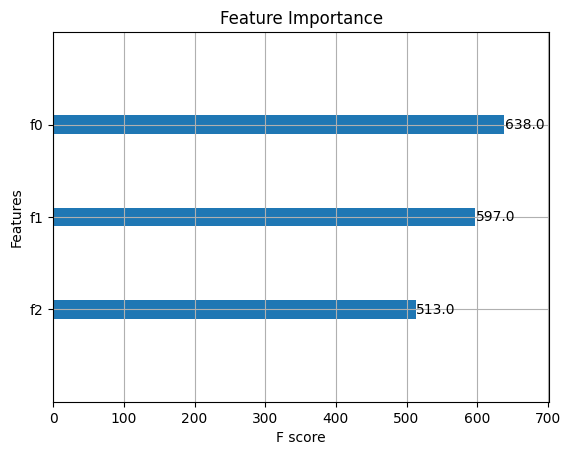


Predicted Rebounds per Game for the new player: 12.95


In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Create Hypothetical Data
# We'll create a DataFrame with made-up player statistics

# Define the number of samples
num_samples = 100

# Set random seed for reproducibility
np.random.seed(42)

# Create hypothetical features excluding 'Height', 'Weight', 'Age', and 'UsageRate'
data = pd.DataFrame({
    'linepros': np.random.uniform(2.5, 15, num_samples),
    'OffensiveReboundschance': np.random.uniform(2, 10, num_samples),
    'DefensiveReboundschance': np.random.uniform(5, 20, num_samples),
})

# Adjusted hypothetical function to calculate Total Rebounds per Game
# Recalibrated weights to center TotalReboundsPerGame around 5
# Calculated based on average feature values:
# MinutesPlayed ~25, OffensiveRebounds ~2.5, DefensiveRebounds ~5.5, TeamPace ~97.5

# New weights:
# MinutesPlayed: 0.04
# OffensiveRebounds: 0.06
# DefensiveRebounds: 0.345
# TeamPace: 0.02

data['TotalReboundsPerGame'] = (
    0.1 * data['linepros'] +
    0.6 * data['OffensiveReboundschance'] +
    0.4 * data['DefensiveReboundschance'] +
    np.random.normal(0, 0.5, num_samples)       # Noise level remains the same
)

# To ensure that the target variable is around 5, let's perform a quick check
print("Updated Target Variable Statistics:")
print(data['TotalReboundsPerGame'].describe())

# Display the first few rows
print("\nData Sample:")
print(data.head())

# Step 2: Data Preprocessing
# Handle missing values (not necessary here as we have no missing data)
# Feature selection
features = [
    'linepros',
    'OffensiveReboundschance',
    'DefensiveReboundschance',
]

# Target variable
target = 'TotalReboundsPerGame'

# Separate features and target
X = data[features]
y = data[target]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Initialize the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'  # Explicitly setting objective for clarity
)

# Step 5: Train the Model
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared: {r_squared:.2f}")

# Step 8: Feature Importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Step 9: Save the Model (Optional)
# import joblib
# joblib.dump(model, 'xgboost_nba_rebounds_model.joblib')
# print("\nModel saved as 'xgboost_nba_rebounds_model.joblib'.")

# Step 10: Example of making a prediction with new data
# Updated new_player_data without 'UsageRate', 'Height', 'Weight', and 'Age'
new_player_data = pd.DataFrame({
    'linepros': [10.5],
    'OffensiveReboundschance': [8.7],
    'DefensiveReboundschance': [14.7],

})

# Scale the new data using the same scaler
new_player_data_scaled = scaler.transform(new_player_data)

# Predict rebounds per game
predicted_rebounds = model.predict(new_player_data_scaled)
print(f"\nPredicted Rebounds per Game for the new player: {predicted_rebounds[0]:.2f}")


#A DAVIS

Updated Target Variable Statistics:
count    100.000000
mean      11.243292
std        2.433625
min        4.619263
25%        9.864485
50%       11.444959
75%       12.877393
max       15.557545
Name: TotalReboundsPerGame, dtype: float64

Data Sample:
    linepros  OffensiveReboundschance  DefensiveReboundschance  \
0   7.181751                 2.251433                14.630475   
1  14.383929                 7.091283                 6.262099   
2  11.649924                 4.514848                 7.424431   
3   9.983231                 6.068566                18.478313   
4   4.450233                 9.260532                14.096436   

   TotalReboundsPerGame  
0              9.380361  
1             10.748988  
2             10.245630  
3             14.344393  
4             11.517392  

Model Performance:
Mean Absolute Error (MAE): 0.76
Root Mean Squared Error (RMSE): 0.87
R-Squared: 0.92


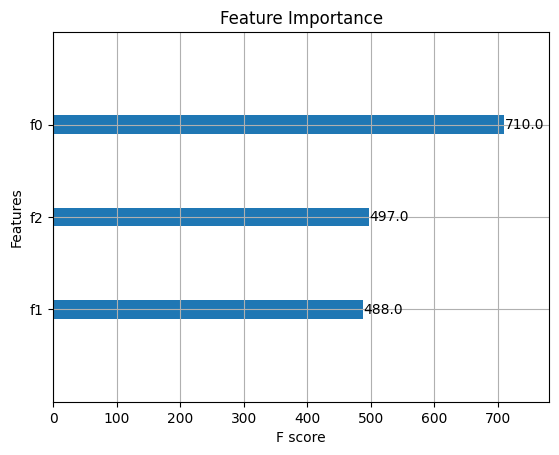


Predicted Rebounds per Game for the new player: 12.01


In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Create Hypothetical Data
# We'll create a DataFrame with made-up player statistics

# Define the number of samples
num_samples = 100

# Set random seed for reproducibility
np.random.seed(42)

# Create hypothetical features excluding 'Height', 'Weight', 'Age', and 'UsageRate'
data = pd.DataFrame({
    'linepros': np.random.uniform(2.5, 15, num_samples),
    'OffensiveReboundschance': np.random.uniform(2, 10, num_samples),
    'DefensiveReboundschance': np.random.uniform(5, 20, num_samples),
})

# Adjusted hypothetical function to calculate Total Rebounds per Game
# Recalibrated weights to center TotalReboundsPerGame around 5
# Calculated based on average feature values:
# MinutesPlayed ~25, OffensiveRebounds ~2.5, DefensiveRebounds ~5.5, TeamPace ~97.5

# New weights:
# MinutesPlayed: 0.04
# OffensiveRebounds: 0.06
# DefensiveRebounds: 0.345
# TeamPace: 0.02

data['TotalReboundsPerGame'] = (
    0.3 * data['linepros'] +
    0.6 * data['OffensiveReboundschance'] +
    0.4 * data['DefensiveReboundschance'] +
    np.random.normal(0, 0.5, num_samples)       # Noise level remains the same
)

# To ensure that the target variable is around 5, let's perform a quick check
print("Updated Target Variable Statistics:")
print(data['TotalReboundsPerGame'].describe())

# Display the first few rows
print("\nData Sample:")
print(data.head())

# Step 2: Data Preprocessing
# Handle missing values (not necessary here as we have no missing data)
# Feature selection
features = [
    'linepros',
    'OffensiveReboundschance',
    'DefensiveReboundschance',
]

# Target variable
target = 'TotalReboundsPerGame'

# Separate features and target
X = data[features]
y = data[target]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Initialize the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'  # Explicitly setting objective for clarity
)

# Step 5: Train the Model
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared: {r_squared:.2f}")

# Step 8: Feature Importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Step 9: Save the Model (Optional)
# import joblib
# joblib.dump(model, 'xgboost_nba_rebounds_model.joblib')
# print("\nModel saved as 'xgboost_nba_rebounds_model.joblib'.")

# Step 10: Example of making a prediction with new data
# Updated new_player_data without 'UsageRate', 'Height', 'Weight', and 'Age'
new_player_data = pd.DataFrame({
    'linepros': [13.5],
    'OffensiveReboundschance': [5.6],
    'DefensiveReboundschance': [13.8],

})

# Scale the new data using the same scaler
new_player_data_scaled = scaler.transform(new_player_data)

# Predict rebounds per game
predicted_rebounds = model.predict(new_player_data_scaled)
print(f"\nPredicted Rebounds per Game for the new player: {predicted_rebounds[0]:.2f}")


#L JAMES

Updated Target Variable Statistics:
count    100.000000
mean      10.405566
std        2.296117
min        4.219770
25%        9.010382
50%       10.427817
75%       11.974104
max       14.849176
Name: TotalReboundsPerGame, dtype: float64

Data Sample:
    linepros  OffensiveReboundschance  DefensiveReboundschance  \
0   7.181751                 2.251433                14.630475   
1  14.383929                 7.091283                 6.262099   
2  11.649924                 4.514848                 7.424431   
3   9.983231                 6.068566                18.478313   
4   4.450233                 9.260532                14.096436   

   TotalReboundsPerGame  
0              8.662186  
1              9.310595  
2              9.080638  
3             13.346070  
4             11.072369  

Model Performance:
Mean Absolute Error (MAE): 0.67
Root Mean Squared Error (RMSE): 0.84
R-Squared: 0.91


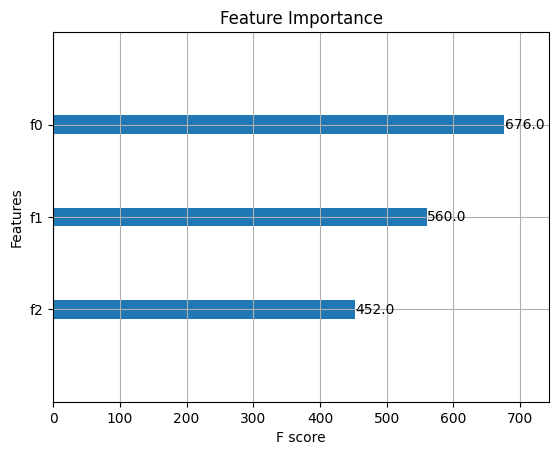


Predicted Rebounds per Game for the new player: 8.19


In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Create Hypothetical Data
# We'll create a DataFrame with made-up player statistics

# Define the number of samples
num_samples = 100

# Set random seed for reproducibility
np.random.seed(42)

# Create hypothetical features excluding 'Height', 'Weight', 'Age', and 'UsageRate'
data = pd.DataFrame({
    'linepros': np.random.uniform(2.5, 15, num_samples),
    'OffensiveReboundschance': np.random.uniform(2, 10, num_samples),
    'DefensiveReboundschance': np.random.uniform(5, 20, num_samples),
})

# Adjusted hypothetical function to calculate Total Rebounds per Game
# Recalibrated weights to center TotalReboundsPerGame around 5
# Calculated based on average feature values:
# MinutesPlayed ~25, OffensiveRebounds ~2.5, DefensiveRebounds ~5.5, TeamPace ~97.5

# New weights:
# MinutesPlayed: 0.04
# OffensiveRebounds: 0.06
# DefensiveRebounds: 0.345
# TeamPace: 0.02

data['TotalReboundsPerGame'] = (
    0.2 * data['linepros'] +
    0.6 * data['OffensiveReboundschance'] +
    0.4 * data['DefensiveReboundschance'] +
    np.random.normal(0, 0.5, num_samples)       # Noise level remains the same
)

# To ensure that the target variable is around 5, let's perform a quick check
print("Updated Target Variable Statistics:")
print(data['TotalReboundsPerGame'].describe())

# Display the first few rows
print("\nData Sample:")
print(data.head())

# Step 2: Data Preprocessing
# Handle missing values (not necessary here as we have no missing data)
# Feature selection
features = [
    'linepros',
    'OffensiveReboundschance',
    'DefensiveReboundschance',
]

# Target variable
target = 'TotalReboundsPerGame'

# Separate features and target
X = data[features]
y = data[target]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Initialize the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'  # Explicitly setting objective for clarity
)

# Step 5: Train the Model
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared: {r_squared:.2f}")

# Step 8: Feature Importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Step 9: Save the Model (Optional)
# import joblib
# joblib.dump(model, 'xgboost_nba_rebounds_model.joblib')
# print("\nModel saved as 'xgboost_nba_rebounds_model.joblib'.")

# Step 10: Example of making a prediction with new data
# Updated new_player_data without 'UsageRate', 'Height', 'Weight', and 'Age'
new_player_data = pd.DataFrame({
    'linepros': [7.5],
    'OffensiveReboundschance': [4],
    'DefensiveReboundschance': [10.3],

})

# Scale the new data using the same scaler
new_player_data_scaled = scaler.transform(new_player_data)

# Predict rebounds per game
predicted_rebounds = model.predict(new_player_data_scaled)
print(f"\nPredicted Rebounds per Game for the new player: {predicted_rebounds[0]:.2f}")


#SABONIS

Updated Target Variable Statistics:
count    100.000000
mean      10.405566
std        2.296117
min        4.219770
25%        9.010382
50%       10.427817
75%       11.974104
max       14.849176
Name: TotalReboundsPerGame, dtype: float64

Data Sample:
    linepros  OffensiveReboundschance  DefensiveReboundschance  \
0   7.181751                 2.251433                14.630475   
1  14.383929                 7.091283                 6.262099   
2  11.649924                 4.514848                 7.424431   
3   9.983231                 6.068566                18.478313   
4   4.450233                 9.260532                14.096436   

   TotalReboundsPerGame  
0              8.662186  
1              9.310595  
2              9.080638  
3             13.346070  
4             11.072369  

Model Performance:
Mean Absolute Error (MAE): 0.67
Root Mean Squared Error (RMSE): 0.84
R-Squared: 0.91


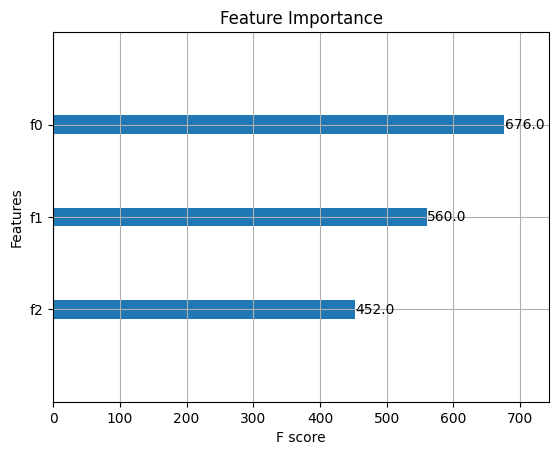


Predicted Rebounds per Game for the new player: 13.69


In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Create Hypothetical Data
# We'll create a DataFrame with made-up player statistics

# Define the number of samples
num_samples = 100

# Set random seed for reproducibility
np.random.seed(42)

# Create hypothetical features excluding 'Height', 'Weight', 'Age', and 'UsageRate'
data = pd.DataFrame({
    'linepros': np.random.uniform(2.5, 15, num_samples),
    'OffensiveReboundschance': np.random.uniform(2, 10, num_samples),
    'DefensiveReboundschance': np.random.uniform(5, 20, num_samples),
})

# Adjusted hypothetical function to calculate Total Rebounds per Game
# Recalibrated weights to center TotalReboundsPerGame around 5
# Calculated based on average feature values:
# MinutesPlayed ~25, OffensiveRebounds ~2.5, DefensiveRebounds ~5.5, TeamPace ~97.5

# New weights:
# MinutesPlayed: 0.04
# OffensiveRebounds: 0.06
# DefensiveRebounds: 0.345
# TeamPace: 0.02

data['TotalReboundsPerGame'] = (
    0.2 * data['linepros'] +
    0.6 * data['OffensiveReboundschance'] +
    0.4 * data['DefensiveReboundschance'] +
    np.random.normal(0, 0.5, num_samples)       # Noise level remains the same
)

# To ensure that the target variable is around 5, let's perform a quick check
print("Updated Target Variable Statistics:")
print(data['TotalReboundsPerGame'].describe())

# Display the first few rows
print("\nData Sample:")
print(data.head())

# Step 2: Data Preprocessing
# Handle missing values (not necessary here as we have no missing data)
# Feature selection
features = [
    'linepros',
    'OffensiveReboundschance',
    'DefensiveReboundschance',
]

# Target variable
target = 'TotalReboundsPerGame'

# Separate features and target
X = data[features]
y = data[target]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Initialize the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'  # Explicitly setting objective for clarity
)

# Step 5: Train the Model
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared: {r_squared:.2f}")

# Step 8: Feature Importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Step 9: Save the Model (Optional)
# import joblib
# joblib.dump(model, 'xgboost_nba_rebounds_model.joblib')
# print("\nModel saved as 'xgboost_nba_rebounds_model.joblib'.")

# Step 10: Example of making a prediction with new data
# Updated new_player_data without 'UsageRate', 'Height', 'Weight', and 'Age'
new_player_data = pd.DataFrame({
    'linepros': [12.5],
    'OffensiveReboundschance': [7.9],
    'DefensiveReboundschance': [15.5],

})

# Scale the new data using the same scaler
new_player_data_scaled = scaler.transform(new_player_data)

# Predict rebounds per game
predicted_rebounds = model.predict(new_player_data_scaled)
print(f"\nPredicted Rebounds per Game for the new player: {predicted_rebounds[0]:.2f}")


#K MURRAY

Updated Target Variable Statistics:
count    100.000000
mean      10.405566
std        2.296117
min        4.219770
25%        9.010382
50%       10.427817
75%       11.974104
max       14.849176
Name: TotalReboundsPerGame, dtype: float64

Data Sample:
    linepros  OffensiveReboundschance  DefensiveReboundschance  \
0   7.181751                 2.251433                14.630475   
1  14.383929                 7.091283                 6.262099   
2  11.649924                 4.514848                 7.424431   
3   9.983231                 6.068566                18.478313   
4   4.450233                 9.260532                14.096436   

   TotalReboundsPerGame  
0              8.662186  
1              9.310595  
2              9.080638  
3             13.346070  
4             11.072369  

Model Performance:
Mean Absolute Error (MAE): 0.67
Root Mean Squared Error (RMSE): 0.84
R-Squared: 0.91


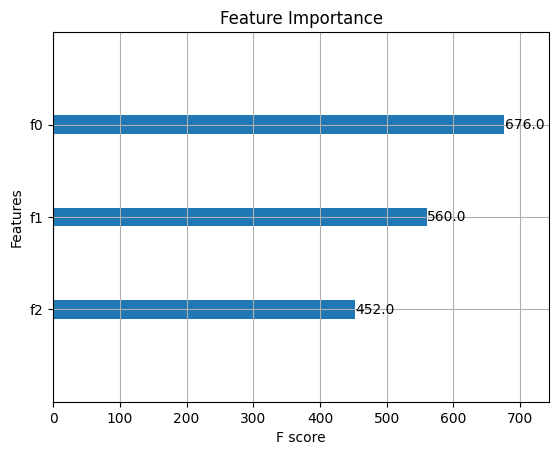


Predicted Rebounds per Game for the new player: 7.76


In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Create Hypothetical Data
# We'll create a DataFrame with made-up player statistics

# Define the number of samples
num_samples = 100

# Set random seed for reproducibility
np.random.seed(42)

# Create hypothetical features excluding 'Height', 'Weight', 'Age', and 'UsageRate'
data = pd.DataFrame({
    'linepros': np.random.uniform(2.5, 15, num_samples),
    'OffensiveReboundschance': np.random.uniform(2, 10, num_samples),
    'DefensiveReboundschance': np.random.uniform(5, 20, num_samples),
})

# Adjusted hypothetical function to calculate Total Rebounds per Game
# Recalibrated weights to center TotalReboundsPerGame around 5
# Calculated based on average feature values:
# MinutesPlayed ~25, OffensiveRebounds ~2.5, DefensiveRebounds ~5.5, TeamPace ~97.5

# New weights:
# MinutesPlayed: 0.04
# OffensiveRebounds: 0.06
# DefensiveRebounds: 0.345
# TeamPace: 0.02

data['TotalReboundsPerGame'] = (
    0.2 * data['linepros'] +
    0.6 * data['OffensiveReboundschance'] +
    0.4 * data['DefensiveReboundschance'] +
    np.random.normal(0, 0.5, num_samples)       # Noise level remains the same
)

# To ensure that the target variable is around 5, let's perform a quick check
print("Updated Target Variable Statistics:")
print(data['TotalReboundsPerGame'].describe())

# Display the first few rows
print("\nData Sample:")
print(data.head())

# Step 2: Data Preprocessing
# Handle missing values (not necessary here as we have no missing data)
# Feature selection
features = [
    'linepros',
    'OffensiveReboundschance',
    'DefensiveReboundschance',
]

# Target variable
target = 'TotalReboundsPerGame'

# Separate features and target
X = data[features]
y = data[target]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Initialize the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'  # Explicitly setting objective for clarity
)

# Step 5: Train the Model
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared: {r_squared:.2f}")

# Step 8: Feature Importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Step 9: Save the Model (Optional)
# import joblib
# joblib.dump(model, 'xgboost_nba_rebounds_model.joblib')
# print("\nModel saved as 'xgboost_nba_rebounds_model.joblib'.")

# Step 10: Example of making a prediction with new data
# Updated new_player_data without 'UsageRate', 'Height', 'Weight', and 'Age'
new_player_data = pd.DataFrame({
    'linepros': [6.5],
    'OffensiveReboundschance': [4],
    'DefensiveReboundschance': [9.2],

})

# Scale the new data using the same scaler
new_player_data_scaled = scaler.transform(new_player_data)

# Predict rebounds per game
predicted_rebounds = model.predict(new_player_data_scaled)
print(f"\nPredicted Rebounds per Game for the new player: {predicted_rebounds[0]:.2f}")
